In [19]:
import numpy as np
import matplotlib.pyplot as plt
import torch 
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.autograd import Variable
from torchvision import datasets, transforms

In [20]:
#Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#print(device) My laptop uses cpu
torch.manual_seed(2023)

#Download MNIST dataset in local system
from torchvision import datasets
from torchvision.transforms import ToTensor

train_data = datasets.MNIST(
    root = 'data',
    train = True,                         
    transform = transforms.Compose([
                transforms.ToTensor()
                ]),
#    transform = ToTensor(), 
    download = True,            
)

test_data = datasets.MNIST(
    root = 'data', 
    train = False, 
    transform = transforms.Compose([
                transforms.ToTensor()
                ]),
)

loaders = {
    'train' :   torch.utils.data.DataLoader(train_data,
                                            batch_size = 100,
                                            shuffle=True
                                           ),
    'test'  :   torch.utils.data.DataLoader(test_data,
                                            batch_size = 100,
                                            shuffle=True
                                            )
}

In [21]:
class Model1(nn.Module):
    def __init__(self):
        super(Model1, self).__init__()
        self.l1 = nn.Linear(784, 5)
        self.l2 = nn.Linear(5, 30)
        self.l3 = nn.Linear(30, 10)


    def forward(self, x):
        out = F.relu(self.l1(x))
        out = F.relu(self.l2(out))
        out = F.relu(self.l3(out))
        return out

class Model2(nn.Module):
    def __init__(self):
        super(Model2, self).__init__()
        self.l1 = nn.Linear(784, 15)
        self.l2 = nn.Linear(15, 30)
        self.l3 = nn.Linear(30, 10)


    def forward(self, x):
        out = F.relu(self.l1(x))
        out = F.relu(self.l2(out))
        out = F.relu(self.l3(out))
        return out

class Model3(nn.Module):
    def __init__(self):
        super(Model3, self).__init__()
        self.l1 = nn.Linear(784, 50)
        self.l2 = nn.Linear(50, 100)
        self.l3 = nn.Linear(100, 10)


    def forward(self, x):
        out = F.relu(self.l1(x))
        out = F.relu(self.l2(out))
        out = F.relu(self.l3(out))
        return out

class Model4(nn.Module):
    def __init__(self):
        super(Model4, self).__init__()
        self.l1 = nn.Linear(784, 80)
        self.l2 = nn.Linear(80, 160)
        self.l3 = nn.Linear(160, 10)


    def forward(self, x):
        out = F.relu(self.l1(x))
        out = F.relu(self.l2(out))
        out = F.relu(self.l3(out))
        return out

class Model5(nn.Module):
    def __init__(self):
        super(Model5, self).__init__()
        self.l1 = nn.Linear(784, 100)
        self.l2 = nn.Linear(100, 200)
        self.l3 = nn.Linear(200, 10)


    def forward(self, x):
        out = F.relu(self.l1(x))
        out = F.relu(self.l2(out))
        out = F.relu(self.l3(out))
        return out

class Model6(nn.Module):
    def __init__(self):
        super(Model6, self).__init__()
        self.l1 = nn.Linear(784, 150)
        self.l2 = nn.Linear(150, 300)
        self.l3 = nn.Linear(300, 10)


    def forward(self, x):
        out = F.relu(self.l1(x))
        out = F.relu(self.l2(out))
        out = F.relu(self.l3(out))
        return out

class Model7(nn.Module):
    def __init__(self):
        super(Model7, self).__init__()
        self.l1 = nn.Linear(784, 250)
        self.l2 = nn.Linear(250, 500)
        self.l3 = nn.Linear(500, 10)


    def forward(self, x):
        out = F.relu(self.l1(x))
        out = F.relu(self.l2(out))
        out = F.relu(self.l3(out))
        return out

class Model8(nn.Module):
    def __init__(self):
        super(Model8, self).__init__()
        self.l1 = nn.Linear(784, 200)
        self.l2 = nn.Linear(200, 300)
        self.l3 = nn.Linear(300, 10)


    def forward(self, x):
        out = F.relu(self.l1(x))
        out = F.relu(self.l2(out))
        out = F.relu(self.l3(out))
        return out

class Model9(nn.Module):
    def __init__(self):
        super(Model9, self).__init__()
        self.l1 = nn.Linear(784, 200)
        self.l2 = nn.Linear(200, 400)
        self.l3 = nn.Linear(400, 10)


    def forward(self, x):
        out = F.relu(self.l1(x))
        out = F.relu(self.l2(out))
        out = F.relu(self.l3(out))
        return out

class Model10(nn.Module):
    def __init__(self):
        super(Model10, self).__init__()
        self.l1 = nn.Linear(784, 300)
        self.l2 = nn.Linear(300, 500)
        self.l3 = nn.Linear(500, 10)


    def forward(self, x):
        out = F.relu(self.l1(x))
        out = F.relu(self.l2(out))
        out = F.relu(self.l3(out))
        return out

In [28]:
model = Model1()
model

Model1(
  (l1): Linear(in_features=784, out_features=5, bias=True)
  (l2): Linear(in_features=5, out_features=30, bias=True)
  (l3): Linear(in_features=30, out_features=10, bias=True)
)

In [12]:
def get_parameters(model):
    return sum(p.numel() for p in model.parameters())
def set_optimizer(model):
    return torch.optim.Adam(model.parameters(), lr = 0.001)

In [13]:
def train(model, optimizer, loaders, loss_func):
    model.train()
    for i, (image, label) in enumerate(loaders):
            b_x = Variable(image)
            b_y = Variable(label)
            optimizer.zero_grad()
            # or use data, target = Variable(images), Variable(labels)
            output = model(b_x.view(-1, 784))

            loss = loss_func(output, b_y)
            loss.backward()
            optimizer.step()

In [14]:
def calc_loss_acc(model, loader, loss_func):
    correct = 0
    total = 0
    loss_total = 0
    Count = 0
    with torch.no_grad():
        for batch in loader:
            image, label = batch
            output = model(image.view(-1, 784))
            loss = loss_func(output, label)
            loss_total +=loss
            Count +=1
            for i, out_y in enumerate(output):
                if torch.argmax(out_y) == label[i]:
                    correct +=1
                total +=1
    return loss_total / Count, round(correct/total, 3) # Return the loss and accuracy.

In [15]:
Loss_arr = []
Acc_arr = []
Params_arr = []

def get_result(model, epoch_num, optimizer):
    loss_func = torch.nn.CrossEntropyLoss()
    for epoch in range(1, epoch_num + 1):
        train(model, optimizer, loaders['train'], loss_func)
        Train_loss, Train_acc = calc_loss_acc(model, loaders['train'], loss_func)
        Test_loss, Test_acc = calc_loss_acc(model, loaders['test'], loss_func)
    Loss_arr.append([Train_loss, Test_loss])
    Acc_arr.append([Train_acc, Test_acc])
    Params_arr.append(get_parameters(model))
    print("Model Train loss: ", Train_loss)
    print("Model Test loss: ", Test_loss)

In [16]:
epoch_num = 10

model1 = Model1()
print("Model 1 parameters: ", (get_parameters(model1)))
optimizer = set_optimizer(model1)
get_result(model1, epoch_num, optimizer)

model = Model2()
print("Model 2 parameters: ", (get_parameters(model)))
optimizer = set_optimizer(model)
get_result(model, epoch_num , optimizer)

model = Model3()
print("Model 3 parameters: ", (get_parameters(model)))
optimizer = set_optimizer(model)
get_result(model, epoch_num , optimizer)

model = Model4()
print("Model 4 parameters: ", (get_parameters(model)))
optimizer = set_optimizer(model)
get_result(model, epoch_num , optimizer)

model = Model5()
print("Model 5 parameters: ", (get_parameters(model)))
optimizer = set_optimizer(model)
get_result(model, epoch_num , optimizer)

model = Model6()
print("Model 6 parameters: ", (get_parameters(model)))
optimizer = set_optimizer(model)
get_result(model, epoch_num , optimizer)

model = Model7()
print("Model 7 parameters: ", (get_parameters(model)))
optimizer = set_optimizer(model)
get_result(model, epoch_num , optimizer)

model = Model8()
print("Model 8 parameters: ", (get_parameters(model)))
optimizer = set_optimizer(model)
get_result(model, epoch_num , optimizer)

model = Model9()
print("Model 9 parameters: ", (get_parameters(model)))
optimizer = set_optimizer(model)
get_result(model, epoch_num , optimizer)

model = Model10()
print("Model 10 parameters: ", (get_parameters(model)))
optimizer = set_optimizer(model)
get_result(model, epoch_num , optimizer)

Model 1 parameters:  4415
Model Train loss:  tensor(0.7288)
Model Test loss:  tensor(0.7317)
Model 2 parameters:  12565
Model Train loss:  tensor(0.5855)
Model Test loss:  tensor(0.5993)
Model 3 parameters:  45360
Model Train loss:  tensor(0.0358)
Model Test loss:  tensor(0.0843)
Model 4 parameters:  77370
Model Train loss:  tensor(0.2504)
Model Test loss:  tensor(0.3017)
Model 5 parameters:  100710
Model Train loss:  tensor(0.2561)
Model Test loss:  tensor(0.3044)
Model 6 parameters:  166060
Model Train loss:  tensor(0.4546)
Model Test loss:  tensor(0.5173)
Model 7 parameters:  326760
Model Train loss:  tensor(1.1725)
Model Test loss:  tensor(1.2138)
Model 8 parameters:  220310
Model Train loss:  tensor(0.6732)
Model Test loss:  tensor(0.7145)
Model 9 parameters:  241410
Model Train loss:  tensor(0.6729)
Model Test loss:  tensor(0.7173)
Model 10 parameters:  391010
Model Train loss:  tensor(0.7117)
Model Test loss:  tensor(0.7612)


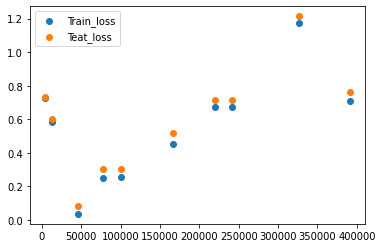

In [17]:
L = np.array(Loss_arr)
A = np.array(Acc_arr)
P = np.array(Params_arr)
import matplotlib.pyplot as plt
plt.scatter(P, L[:, 0], label = 'Train_loss')
plt.scatter(P, L[:, 1], label = 'Teat_loss')
plt.legend()
plt.show()


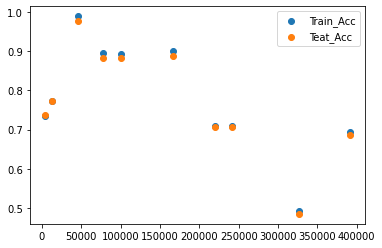

In [18]:
plt.scatter(P, A[:, 0], label = 'Train_Acc')
plt.scatter(P, A[:, 1], label = 'Teat_Acc')
plt.legend()

plt.show()